Create demo dataset from full atlas including the three datasets in our example that can be used for downstream analyses

In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("/home/sturm/projects/2020/pircher-scrnaseq-lung/data/20_build_atlas/add_additional_datasets/03_update_annotation/artifacts/full_atlas_merged.h5ad")

In [3]:
adata.obs["dataset"].value_counts()

Kim_Lee_2020                                        175526
Adams_Kaminski_2020                                 131092
Leader_Merad_2021_10x_3p_v2_beads                   121265
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Madissoon_Meyer_2020                                 46116
Lambrechts_Thienpont_2018_6149v2                     40141
Habermann_Kropski_2020                               36727
Goveia_Carmeliet_2020                                36368
Reyfman_Misharin_2018                                34535
Laughney_Massague_2020                               26403
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                       226

In [4]:
adata_sub = adata[adata.obs["dataset"].isin(["Maynard_Bivona_2020", "Lambrechts_Thienpont_2018_6653", "UKIM-V"]), :].copy()

In [5]:
adata_sub

AnnData object with n_obs × n_vars = 62119 × 17837
    obs: 'sample', 'uicc_stage', 'sex', 'ever_smoker', 'driver_genes', 'condition', 'age', 'patient', 'tissue', 'origin', 'dataset', 'cell_type', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'cell_type_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'platform_fine', 'cell_type_major', 'batch', '_predictions', '_leiden', '_cell_type_tumor_predicted'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: '_cell_type_tumor_predicted_colors', '_scvi', 'cell_type_coarse_colors', 'cell_type_major_colors', 'cell_type_predicted_colors', 'cell_type_tumor_colors', 'condition_colors', 'dataset_colors', 'doublet_status_colors', 'ever_smoker_colors', 'h

In [6]:
sc.pp.neighbors(adata_sub, use_rep="X_scANVI")

2023-03-28 11:54:15.848406: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-28 11:54:15.848470: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
sc.tl.umap(adata_sub, init_pos="X_umap")

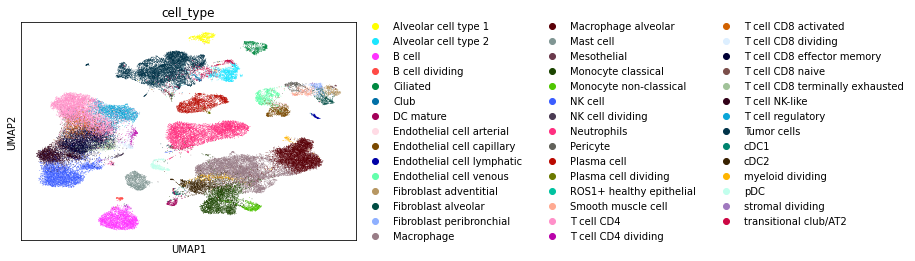

In [8]:
sc.pl.umap(adata_sub, color="cell_type")

In [9]:
adata_sub.write_h5ad("../data/input_data_zenodo/atlas-integrated-annotated.h5ad")